In [1]:
import os
import datetime
import datalib_mt5 as dlm
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import my_pre_processing_routine as mpr

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
print(tf.__version__)

2.3.0


## ===========================================================================

In [2]:
dlm.insert_db()

continue(y/n)? >>>  n


current in: D:/Workspace/jupyter_workspace/my_advisor/db/temp.db


new will delete currents tables.
new set (y/n)? >>>  y


In [2]:
full_batch_1 = dlm.request_table()
full_batch_1.t_DATE.unique()

array(['2020.09.21'], dtype=object)

In [ ]:
df=full_batch_1

In [3]:
shift = 10
target = 10
full_feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
time_step = 30
df, x_, y_= mpr.process_dataset(full_batch_1, False,  shift, target, full_feature_list, time_step, True)

In [ ]:
#df.to_pickle('m10_df')

## ===========================================================================

In [5]:
df = pd.read_pickle('m10_df')

In [4]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df = df.drop(columns=['t_LAST_Shift','t_TIME_Shift','t_POS_const','t_POS_up','t_POS_down'])
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

0     2020-09-21 09:21:00
1     2020-09-21 09:22:00
2     2020-09-21 09:23:00
3     2020-09-21 09:24:00
4     2020-09-21 09:25:00
              ...        
503   2020-09-21 17:45:00
504   2020-09-21 17:46:00
505   2020-09-21 17:47:00
506   2020-09-21 17:48:00
507   2020-09-21 17:49:00
Name: t_DATE-TIME, Length: 508, dtype: datetime64[ns]

In [5]:
full_feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
plot_cols = full_feature_list[:3]

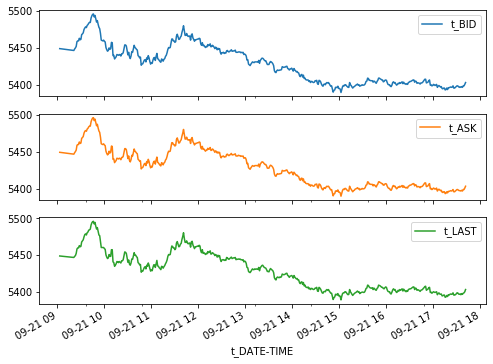

In [6]:
plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

In [ ]:
plot_cols = full_feature_list[3:6]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [ ]:
plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t_BID,508.0,5426.918307,26.024354,5389.500000,5402.500000,5426.750000,5446.625000,5.496000e+03
t_ASK,508.0,5427.437008,26.027655,5390.000000,5403.000000,5427.250000,5447.125000,5.496500e+03
t_LAST,508.0,5427.186024,26.021978,5389.500000,5403.000000,5427.000000,5447.000000,5.496000e+03
t_VOLUME,508.0,2.683071,4.535195,1.000000,1.000000,1.000000,2.000000,5.000000e+01
t_TYPE,508.0,0.466535,0.499371,0.000000,0.000000,0.000000,1.000000,1.000000e+00
iAC,508.0,-2.572777,9.393710,-20.336471,-9.482647,-1.905294,3.039117,2.341765e+01
iAD,508.0,586868.701544,138876.647973,356930.481310,474232.143581,559527.544516,701061.793627,1.002589e+06
iADX,508.0,45.100335,16.792431,23.646515,30.373239,40.103988,59.102223,8.281591e+01
iADXWilder,508.0,40.141129,15.282414,24.189557,28.243106,31.956657,48.358804,7.489120e+01
iAlligator,508.0,5411.663698,26.405859,5347.660467,5405.124210,5418.514757,5432.394903,5.437943e+03


#### Volume
The last column of the data, `iVolumes`, gives the volume. Volume is strict connect to the current flow of `t_LAST`
Right now the distribution of volume data looks like this:

Text(0, 0.5, 'iVolumes')

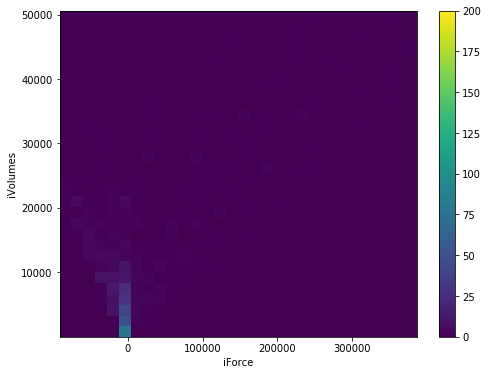

In [6]:
plt.hist2d(df['iForce'], df['iVolumes'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iForce')
plt.ylabel('iVolumes')

In [7]:
v = df['iVolumes']
#v = df.pop('iVolumes')
# Convert to radians.
v_rad = df['iForce']*np.pi / 180
#v_rad = df.pop('t_TYPE')*np.pi / 180
# Calculate the wind x and y components.
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
df=df.drop(columns=['iVolumes','iForce','t_VOLUME'])

(-44239.87497186126, 43439.269644060245, -43631.06358016557, 46878.17216287723)

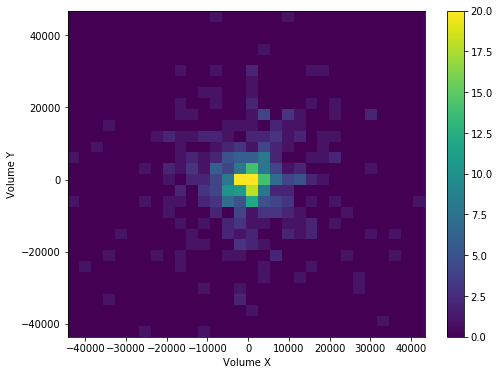

In [8]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Time

In [9]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

0      1.600691e+09
1      1.600691e+09
2      1.600691e+09
3      1.600691e+09
4      1.600691e+09
           ...     
503    1.600721e+09
504    1.600721e+09
505    1.600721e+09
506    1.600721e+09
507    1.600721e+09
Name: t_DATE-TIME, Length: 508, dtype: float64

In [10]:
day = 24*60*60
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'Time of day signal')

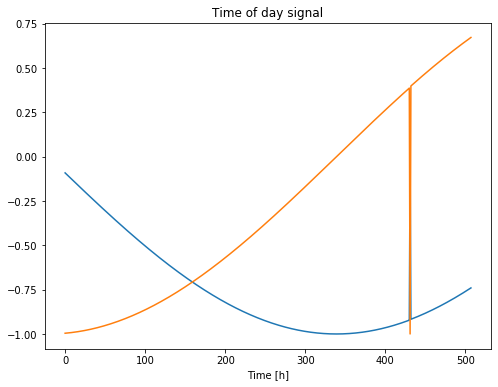

In [11]:
plt.plot(np.array(df['Day sin'])[:])
plt.plot(np.array(df['Day cos'])[:])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [13]:
df.head(3)

,t_BID,t_ASK,t_LAST,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iFractals,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,t_LAST_DELTA,Vx,Vy,Day sin,Day cos
0,5446.5,5447.0,5447.0,0,16.295882,738788.090255,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,40.312201,5381.650,52.312201,153.529426,140.835493,5430.753602,0.962441,5399.50125,0.0,5442.658542,5417.0,0.234819,101.594703,93.018786,5403.45,7.466764,27.331170,-328346.0,5403.6,87.198669,0.205607,31.365626,85.653105,5440.516108,0.000580,-14.705882,5393.505256,21.0,1745.551202,-7726.272840,-0.091502,-0.995805
1,5448.5,5449.0,5448.5,1,16.295882,743830.506922,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,40.097915,5381.725,52.097915,154.467133,695.081705,5431.126935,0.962441,5399.60850,0.0,5443.650565,5417.0,0.269490,101.622680,92.403191,5403.60,7.573126,27.450829,-329776.0,5403.6,88.504849,0.208156,31.523196,86.295503,5441.039664,0.000581,-13.235294,5393.950764,21.0,5587.386167,-7498.154228,-0.095846,-0.995396
2,5450.0,5450.5,5449.5,1,16.295882,748327.673588,76.919832,70.630333,5347.660467,5434.000748,65.727941,13.464286,39.955058,5381.775,51.955058,155.089820,1190.968068,5431.375824,0.962441,5399.68000,0.0,5444.311915,5417.0,0.319258,101.641332,91.429757,5403.70,7.644035,27.530601,-332077.0,5403.6,89.397595,0.209856,31.629683,86.723769,5441.388701,0.000581,-12.254902,5394.258660,21.5,3600.666018,11081.710528,-0.100188,-0.994969


In [12]:
feature_list=['t_BID', 't_ASK', 't_LAST','iCCI', 'iStdDEV','iTEMA', 'Vx', 'Vy', 'Day sin', 'Day cos', 't_LAST_DELTA',]
df = df[feature_list]
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 'iCCI', 'iStdDEV', 'iTEMA', 'Vx', 'Vy',
       'Day sin', 'Day cos', 't_LAST_DELTA'],
      dtype='object')

In [ ]:
plt.figure(figsize=(6, 80))
full_feature_list = df.columns
for index in range(len(full_feature_list)):
    plt.subplot(len(full_feature_list), 1, index+1)
    fft = tf.signal.rfft(df[full_feature_list[index]])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = 60
    hours_per_week = 9*5
    years_per_dataset = n_samples_h/(hours_per_week)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale('log')
    plt.ylim(0, 100000)
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 2700], labels=['1/hr', '1/min'])
    _ = plt.xlabel('Frequency (log scale)')
    plt.title(full_feature_list[index])

In [14]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [15]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[:]
val_df = df[:]
test_df = df[:]

num_features = df.shape[1]

In [16]:
print('train samples: '+str(len(train_df)))
print('validation samples: '+str(len(val_df)))
print('test samples: '+str(len(test_df)))

train samples: 508
validation samples: 508
test samples: 508


### Normalize the data

In [17]:
train_df.columns

Index(['t_BID', 't_ASK', 't_LAST', 'iCCI', 'iStdDEV', 'iTEMA', 'Vx', 'Vy',
       'Day sin', 'Day cos', 't_LAST_DELTA'],
      dtype='object')

In [18]:
def pre_processing(df):
    df['label']=df['t_LAST_DELTA']
    df['t_BID']=(df['t_BID'] - df['iTEMA']) / df['iStdDEV']
    df['t_ASK']=(df['t_ASK'] - df['iTEMA']) / df['iStdDEV']
    df['t_LAST']=(df['t_LAST'] - df['iTEMA']) / df['iStdDEV']
    df['iCCI']=(df['iCCI']-df['iCCI'].mean()) / df['iCCI'].std()
    df['Vx']=(df['Vx']-df['Vx'].mean()) / df['Vx'].std()
    df['Vy']=(df['Vy']-df['Vy'].mean()) / df['Vy'].std()
    df = df.drop(columns=['iTEMA'])
    return df
    
train_df = pre_processing(train_df)
val_df = pre_processing(val_df)
test_df = pre_processing(test_df)

C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [19]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}

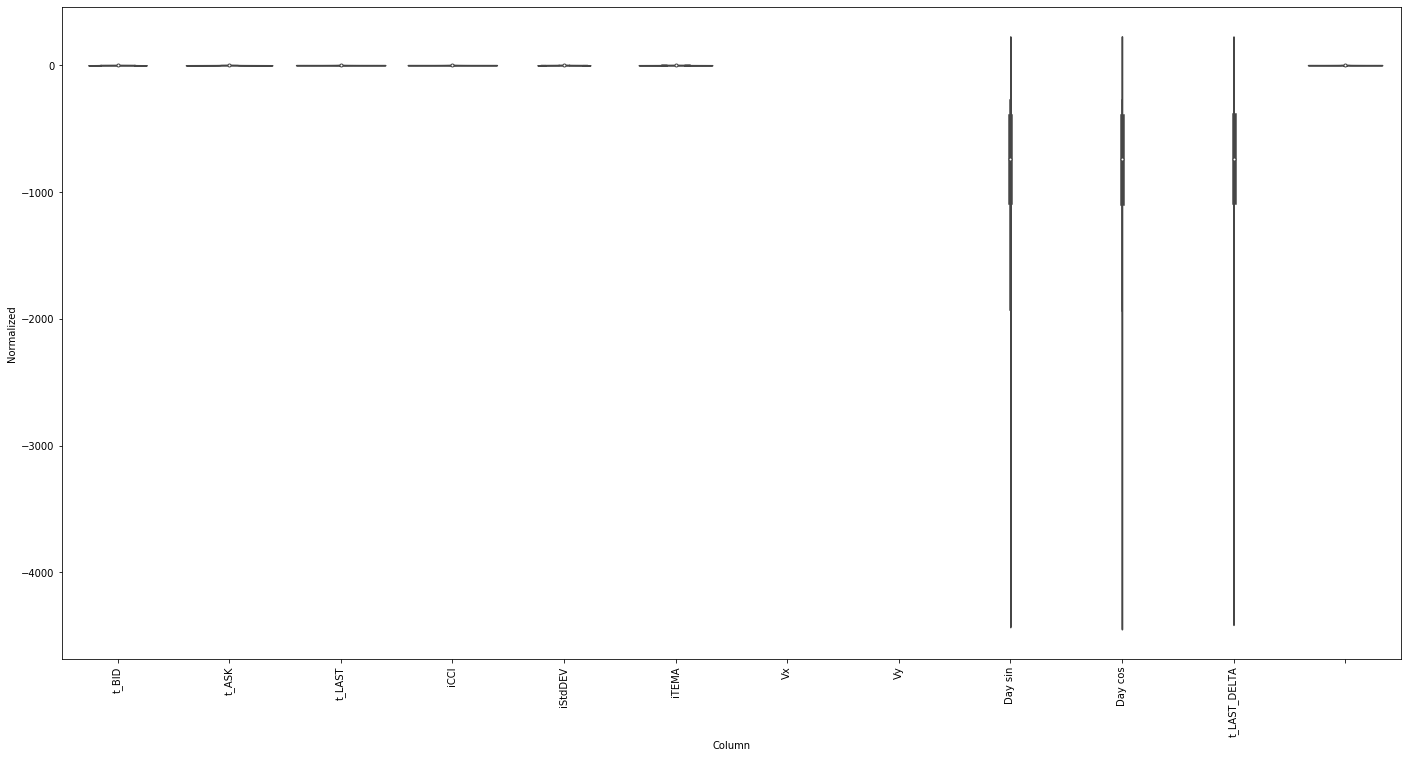

In [27]:
train_mean=train_df.mean()
train_std=train_df.std()
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(24, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [20]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

### 2. Split

In [21]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

### 3. Plot

In [22]:
def plot(self, model=None, plot_col='label', max_subplots=20):
  inputs, labels = self.example
  plt.figure(figsize=(16, 40))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(20, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [m]')

WindowGenerator.plot = plot

### 4. Create `tf.data.Dataset`s

In [23]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [24]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.example))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

## Compile, fit & Callbacks

In [25]:
# callbacks = myCallback()
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.002):
            print("\nReached 0.002 loss or fewer cancelling training")
            self.model.stop_training = True

In [26]:
MAX_EPOCHS = 300
callback1 = myCallback()

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),
                metrics=[tf.metrics.MeanAbsoluteError()])
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

In [27]:
def weights_cal_and_fit(sequencial, win, w_cal, w_epochs):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=5,
                                                    mode='min')
  model_loss=np.zeros(w_cal)
  weights_holder=[]
  for i in range(w_cal):
      
      model=sequencial

      model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),
                    metrics=[tf.metrics.MeanAbsoluteError()])

      temp_history = model.fit(win.train, epochs=w_epochs,
                          validation_data=win.val,verbose=0)
      model_loss.put(i, temp_history.history['loss'][-1])
      weights_holder.append(model)
  model=weights_holder[np.argmin(model_loss)]
  history = model.fit(win.train, epochs=MAX_EPOCHS,
                          validation_data=win.val)
  return history, model

### Multi input single output

In [28]:
CONV_WIDTH = 15
OUT_STEPS = 1
SHIFT = 1
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=OUT_STEPS,
    shift=SHIFT,
    label_columns=['label'])

conv_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15]
Label column name(s): ['label']

In [29]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:conv_window.total_window_size]),
                           np.array(train_df[100:100+conv_window.total_window_size]),
                           np.array(train_df[200:200+conv_window.total_window_size])])


example_inputs, example_labels = conv_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 16, 11)
Inputs shape: (3, 15, 11)
labels shape: (3, 1, 1)


In [30]:
for example_inputs, example_labels in conv_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 15, 11)
Labels shape (batch, time, features): (32, 1, 1)


### Baseline

In [31]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [32]:
baseline = Baseline(label_index=column_indices['label'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [33]:
val_performance = {}
performance = {}

In [34]:
val_performance['Baseline'] = baseline.evaluate(conv_window.val)
performance['Baseline'] = baseline.evaluate(conv_window.test, verbose=0)

16/16 [==============================] - 0s 2ms/step - loss: 111.7661 - mean_absolute_error: 7.0621


### Linear model

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
%%time
MAX_EPOCHS = 300
history = compile_and_fit(linear, conv_window)

val_performance['Linear'] = linear.evaluate(conv_window.val)
performance['Linear'] = linear.evaluate(conv_window.test, verbose=0)

In [ ]:
%%time
MAX_EPOCHS = 1
history, linear = weights_cal_and_fit(linear, conv_window, 5, 1)

val_performance['Linear'] = linear.evaluate(conv_window.val)
performance['Linear'] = linear.evaluate(conv_window.test, verbose=0)
print(linear.evaluate(conv_window.test, verbose=0))

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', baseline(conv_window.example[0]).shape)

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense model

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
#loaded_model = tf.keras.models.load_model('models/multi_step_dense')
#loaded_model.summary()

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

In [ ]:
%%time
MAX_EPOCHS=100
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

In [ ]:
%%time
MAX_EPOCHS=300
history, multi_step_dense = weights_cal_and_fit(multi_step_dense, conv_window, 100, 10)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)
print(multi_step_dense.evaluate(conv_window.test, verbose=0))

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
plt.figure(figsize=(15,15))
plt.bar(x = range(len(train_df.columns)),
        height=multi_step_dense.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [ ]:
print('Input shape:', conv_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(conv_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

### Convolution neural network

In [33]:
#model.add(tf.keras.layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.001),activity_regularizer=tf.keras.regularizers.L2(0.01)))
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001),activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units=1),
])

In [34]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 15, 11)
Output shape: (32, 1, 1)


In [31]:
conv_model = tf.keras.models.load_model('models/multi_step_LSTM')
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10, 128)           2688      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 64)            8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10, 2)             130       
_________________________________________________________________
reshape (Reshape)            (None, 1, 20)             0         
Total params: 11,074
Trainable params: 11,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_model.evaluate(conv_window.test)

In [35]:
%%time
MAX_EPOCHS = 50
history, conv_model = weights_cal_and_fit(conv_model, conv_window, 300, 10)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)
print(conv_model.evaluate(conv_window.test))

Epoch 1/1000
272/272 [==============================] - 1s 4ms/step - loss: 3.9054 - mean_absolute_error: 1.3668 - val_loss: 22.7161 - val_mean_absolute_error: 2.9475
Epoch 2/1000
272/272 [==============================] - 1s 4ms/step - loss: 3.6446 - mean_absolute_error: 1.3512 - val_loss: 21.5789 - val_mean_absolute_error: 2.9020
Epoch 3/1000
272/272 [==============================] - 1s 4ms/step - loss: 3.6300 - mean_absolute_error: 1.3494 - val_loss: 21.9403 - val_mean_absolute_error: 2.9168
Epoch 4/1000
272/272 [==============================] - 1s 4ms/step - loss: 3.7174 - mean_absolute_error: 1.3496 - val_loss: 22.2596 - val_mean_absolute_error: 2.9201
Epoch 5/1000
272/272 [==============================] - 1s 4ms/step - loss: 3.5804 - mean_absolute_error: 1.3483 - val_loss: 22.2597 - val_mean_absolute_error: 2.9227
Epoch 6/1000
272/272 [==============================] - 1s 4ms/step - loss: 3.6865 - mean_absolute_error: 1.3515 - val_loss: 22.1822 - val_mean_absolute_error: 2.912

In [ ]:
%%time
MAX_EPOCHS=100
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

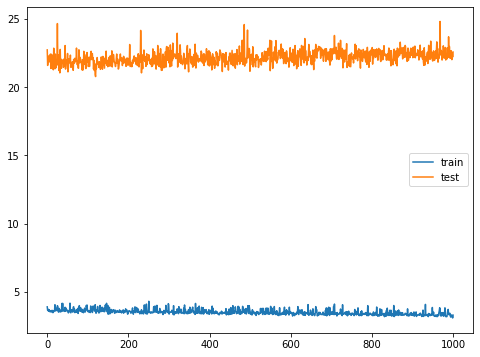

In [36]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
conv_window.plot(conv_model)

In [139]:
len(conv_window.test)

39

In [ ]:
y_true=[]
for element in conv_window.test:
    print(len(element[0][0][0].numpy()))

In [168]:
y_true=np.array(y_true)

In [ ]:
[y for y in element for element in y_true]

In [177]:
y_hat=[]
for element in y_true:
    for y in element:
        y_hat.append(y)

In [179]:
len(y_hat)

In [180]:
len(predictions)

1231

In [62]:
predictions=conv_model.predict(conv_window.test)

In [67]:
predictions=np.squeeze(predictions, axis=-1)

In [80]:
y_true=test_df['t_LAST_DELTA'].values

In [138]:
len(y_true)

39

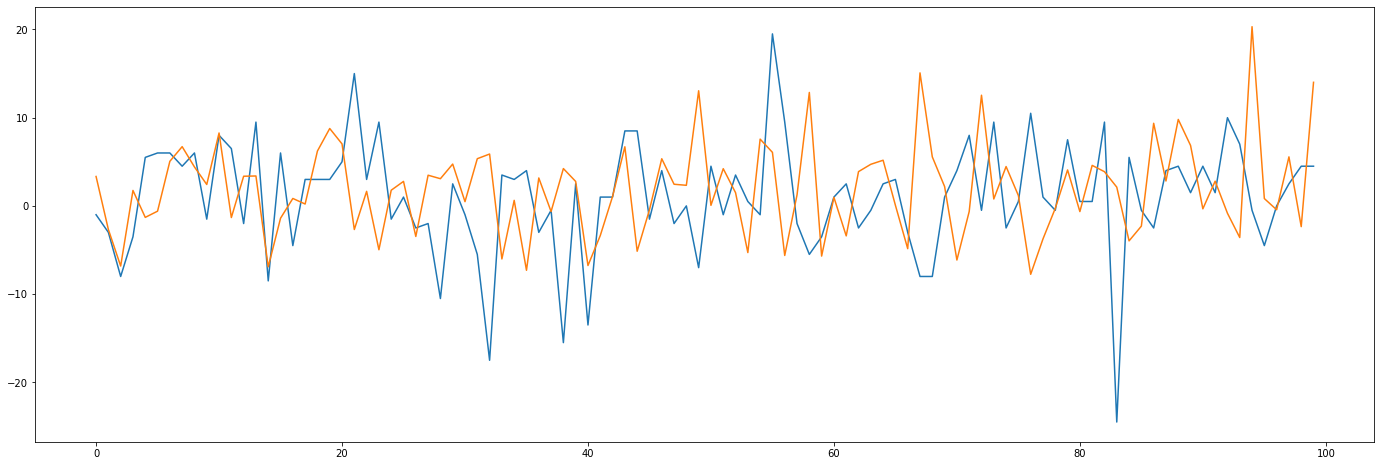

In [189]:
plot_1=y_hat[5:105]
plot_2=predictions[:100]
plt.figure(figsize=(24,8))
plt.plot(np.arange(len(plot_1)), plot_1)
plt.plot(np.arange(len(plot_2)),plot_2)

In [52]:
#conv_model.save('models/conv_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/conv_model\assets


#### Advanced: Residual connections

In [38]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [39]:
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

In [40]:
%%time
MAX_EPOCHS = 1000
history, residual_lstm = weights_cal_and_fit(residual_lstm, conv_window, 100, 10)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(conv_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(conv_window.test, verbose=0)
print(residual_lstm.evaluate(conv_window.test))


39/39 [==============================] - 0s 7ms/step - loss: 49.0560 - mean_absolute_error: 5.1388
[49.055992126464844, 5.138760089874268]
Wall time: 4h 35min 41s


In [ ]:
%%time
MAX_EPOCHS = 100
history = compile_and_fit(residual_lstm, conv_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(conv_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(conv_window.test, verbose=0)
print(residual_lstm.evaluate(conv_window.test))

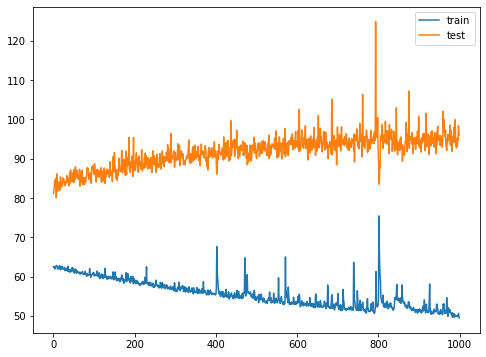

In [41]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

### Advanced: Autoregressive model

#### RNN

In [43]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [44]:
feedback_model = FeedBack(units=64, out_steps=OUT_STEPS)

In [45]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [46]:
prediction, state = feedback_model.warmup(conv_window.example[0])
prediction.shape

TensorShape([32, 11])

In [47]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [48]:
print('Output shape (batch, time, features): ', feedback_model(conv_window.example[0]).shape)

Output shape (batch, time, features):  (32, 1, 11)


In [49]:
%%time
MAX_EPOCHS = 1
history = compile_and_fit(feedback_model, conv_window)

IPython.display.clear_output()

val_performance['AR LSTM'] = feedback_model.evaluate(conv_window.val)
performance['AR LSTM'] = feedback_model.evaluate(conv_window.test, verbose=0)

78/78 [==============================] - 0s 6ms/step - loss: 74.2316 - mean_absolute_error: 5.4842
Wall time: 8 s


In [ ]:
%%time
MAX_EPOCHS = 1
history, feedback_model = weights_cal_and_fit(feedback_model, conv_window, 5, 1) 

IPython.display.clear_output()

val_performance['AR LSTM'] = feedback_model.evaluate(conv_window.val)
performance['AR LSTM'] = feedback_model.evaluate(conv_window.test, verbose=0)
print(feedback_model.evaluate(conv_window.test))

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
conv_window.plot(feedback_model)

### Performance

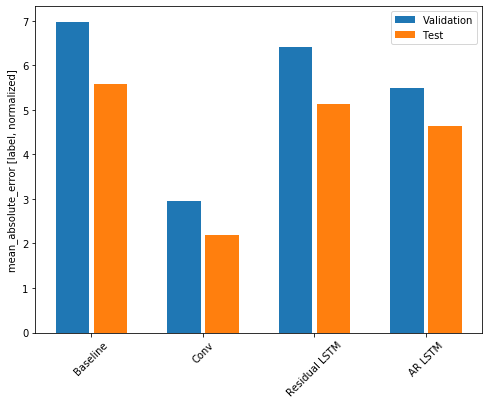

In [50]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = feedback_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [label, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [51]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 5.5821
Conv        : 2.1932
Residual LSTM: 5.1388
AR LSTM     : 4.6376
